In [1]:
import pandas as pd
import numpy as np
import random
%matplotlib inline
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal as random_gauss
from scipy.stats import multivariate_normal
from scipy import random, linalg

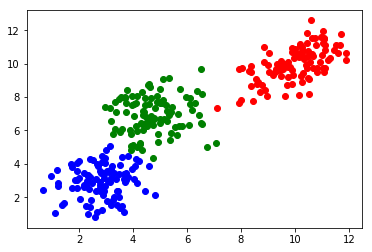

[[ 0.8335308   0.28123457]
 [ 0.28123457  0.51852805]]
[[ 1.37548767  1.1946888 ]
 [ 1.1946888   1.18770292]]
[[ 0.05409745  0.15133031]
 [ 0.15133031  0.77692827]]


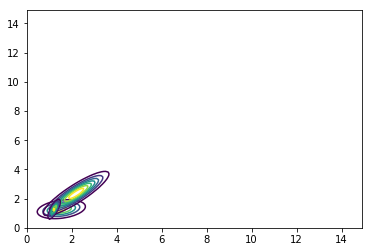

[[ 0.34113382  0.05854325]
 [ 0.05854325  0.12379344]]
[[ 0.51789601  0.4749292 ]
 [ 0.4749292   0.5581927 ]]
[[ 0.01995812  0.04064307]
 [ 0.04064307  0.12987029]]


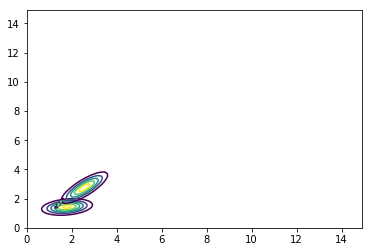

[[ 0.34581936  0.04354998]
 [ 0.04354998  0.08551695]]
[[ 0.31236789  0.26306285]
 [ 0.26306285  0.33792433]]
[[ 0.01871173  0.0360099 ]
 [ 0.0360099   0.06937311]]


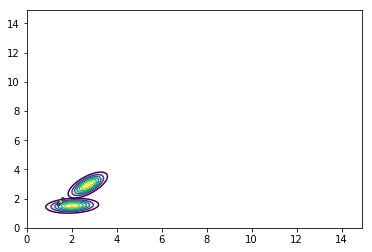

[[ 0.35352743  0.02460113]
 [ 0.02460113  0.06504854]]
[[ 0.18965216  0.13054366]
 [ 0.13054366  0.19726706]]
[[ 0.01726433  0.03328291]
 [ 0.03328291  0.06420086]]


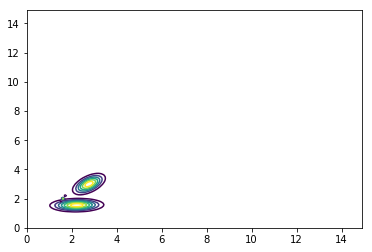

[[ 0.34925336  0.00747133]
 [ 0.00747133  0.05104113]]
[[ 0.13833311  0.0766554 ]
 [ 0.0766554   0.13944755]]
[[ 0.0156185   0.03038092]
 [ 0.03038092  0.0591121 ]]


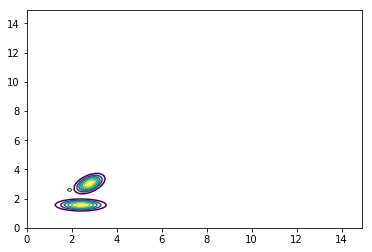

[[ 0.34333399 -0.00101853]
 [-0.00101853  0.04322317]]
[[ 0.11497884  0.05573357]
 [ 0.05573357  0.11802108]]
[[ 0.0146701   0.0286912 ]
 [ 0.0286912   0.05611314]]


LinAlgError: singular matrix

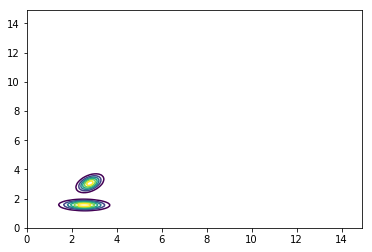

In [7]:
x = []
y = []
distributions = []
colors = ["red", "blue", "green"]
covs = [
    [[1, 0.5], [0.5,  1]],
    [[1, 0.3], [0.3,  1]],
    [[1, 0], [0,  1]]
]
for (x, y), cov in zip([(10, 10), (3, 3), (5, 7)], covs):
    distributions.append(random_gauss((x, y), cov, 100))

for d, c in zip(distributions, colors):
    plt.scatter(d[:,0], d[:,1], color=c)
plt.show()
    
phi = [1/3] * 3
mu = [(0, 0), (0.7, 1), (1, 0.5)] #TODO: actual random data

sigma = []
for _ in range(len(phi)):
    random_matrix = random.rand(2, 2)
    sigma.append(np.dot(random_matrix, random_matrix.transpose()))

samples = np.concatenate(distributions)

weights = np.zeros((len(phi), len(samples)))
for _ in range(100):
    # e-step
    for j in range(len(phi)):
        print(sigma[j])
        rv = multivariate_normal(mu[j], sigma[j])
        for i in range(len(samples)):
            weights[j][i] = rv.pdf(samples[i])
    # m-step
    for j in range(len(phi)):
        phi[j] = np.average(weights[j])
        mu[j] = sum(np.multiply(weights[j], samples.T).T)/sum(weights[j]) 
        s = np.zeros((2, 2))
        for i in range(len(samples)):
            x = samples[i]
            s += weights[j][i] * (np.mat(x - mu[j]).T * np.mat(x - mu[j]))
        s = s / sum(weights[j])
        sigma[j] = s

    for j in range(len(phi)):
        x, y = np.mgrid[0:15:0.1, 0:15:0.1]
        pos = np.dstack((x, y))
        rv = multivariate_normal(mu[j], sigma[j])
        plt.contour(x, y, rv.pdf(pos))
    plt.show()
    